*Importing Data from Google drive *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# List files in the root of Google Drive
drive_path = '/content/drive/MyDrive/osfstorage-archive/pmdata'
files = os.listdir(drive_path)
print(files)


['participant-overview.xlsx', 'p01', 'p12', 'p15', 'p07', 'p06', 'p14', 'p08', 'p09', 'p16', 'p02', 'p04', 'p05', 'p03', 'p13', 'p10', 'p11', 'i_sports.xlsx', 'em_sports.xlsx', 'p.xlsx', 'ipredictions.xlsx']


In [ ]:

participants = ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']

for participant in participants:
    participant_folder = os.path.join(drive_path, participant)
    files = os.listdir(participant_folder)

    # Process the files within the participant's folder
    for file in files:
        file_path = os.path.join(participant_folder, file)

        # Perform necessary data loading and processing steps for each file

        # Example: Load and process a JSON file
        if file.endswith('.json'):
            with open(file_path) as json_file:
                data = json.load(json_file)
                # Process the JSON data as needed

        # Example: Load and process a CSV file
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)



In [ ]:
import pandas as pd
import os
import json


drive_path = '/content/drive/MyDrive/osfstorage-archive/pmdata'
participants = ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']

for participant in participants:
    participant_folder = os.path.join(drive_path, participant)
    files = os.listdir(participant_folder)

    # Initialize variables for feature calculation
    calorie_intake = []
    sleep_quality = []
    training_load = []
    stress_level = []
    active_minutes_ratio = []
    resting_hr_variability = []
    nutrition_balance = []

    # Process the files within the participant's folder
    for file in files:
        file_path = os.path.join(participant_folder, file)

        # Perform necessary data loading and feature calculation steps for each file

        # Example: Calculate average daily calorie intake from food images
        if file.endswith('.zip') and file.startswith('food-images'):
            # Extract relevant information from food images (you will need to implement this step)
            daily_calories = extract_calories_from_images(file_path)
            calorie_intake.extend(daily_calories)

        # Example: Calculate sleep quality score from sleep data
        if file.endswith('.json') and file.startswith('sleep.json'):
            with open(file_path) as json_file:
                sleep_data = json.load(json_file)
                sleep_quality_score = calculate_sleep_quality_score(sleep_data)
                sleep_quality.append(sleep_quality_score)

        # Example: Calculate training load from PMSys data
        if file.endswith('.csv') and file.startswith('srpe.csv'):
            df = pd.read_csv(file_path)
            training_load_value = calculate_training_load(df)
            training_load.append(training_load_value)

        # Example: Calculate stress level from wellness data
        if file.endswith('.csv') and file.startswith('wellness.csv'):
            df = pd.read_csv(file_path)
            stress_level_value = calculate_stress_level(df)
            stress_level.append(stress_level_value)

        # Example: Calculate active minutes ratio from Fitbit data
        if file.endswith('.json') and file.startswith('lightly_active_minutes.json'):
            with open(file_path) as json_file:
                lightly_active_minutes = json.load(json_file)
                total_minutes = sum(lightly_active_minutes.values())
                active_minutes_ratio.append(sum(lightly_active_minutes.values()) / total_minutes)

        # Example: Calculate resting heart rate variability from Fitbit data
        if file.endswith('.json') and file.startswith('resting_heart_rate.json'):
            with open(file_path) as json_file:
                resting_hr_data = json.load(json_file)
                hr_variability = calculate_hr_variability(resting_hr_data)
                resting_hr_variability.append(hr_variability)

        # Example: Calculate nutrition balance from food images or other relevant data
        if file.endswith('.csv') and file.startswith('nutrition.csv'):
            df = pd.read_csv(file_path)
            nutrition_balance_value = calculate_nutrition_balance(df)
            nutrition_balance.append(nutrition_balance_value)




In [ ]:


# Read the JSON file ,the 'exercise.json' file contatins information about physical activities tracked with Fitbit. It is going to be quite useful in answering questions about physical activites
with open('/content/drive/MyDrive/osfstorage-archive/pmdata/p01/fitbit/exercise.json') as file:
    data = json.load(file)

# Convert JSON data to a data frame
pm_p1_exercises = pd.json_normalize(data)

# Display the first few rows of the data frame
print(pm_p1_exercises.head(2))

# Get the column names
col_names = pm_p1_exercises.columns
print(col_names)


         logId activityName  activityTypeId  \
0  26451905128         Walk           90013   
1  26455950499         Walk           90013   

                                       activityLevel  averageHeartRate  \
0  [{'minutes': 0, 'name': 'sedentary'}, {'minute...                94   
1  [{'minutes': 0, 'name': 'sedentary'}, {'minute...                94   

   calories  duration  activeDuration  steps        logType  ... distanceUnit  \
0       192   1331000         1331000   1878  auto_detected  ...          NaN   
1       302   2202000         2202000   2786  auto_detected  ...          NaN   

  tcxLink speed pace  source.type  source.name  source.id  source.url  \
0     NaN   NaN  NaN          NaN          NaN        NaN         NaN   
1     NaN   NaN  NaN          NaN          NaN        NaN         NaN   

   source.trackerFeatures  vo2Max.vo2Max  
0                     NaN            NaN  
1                     NaN            NaN  

[2 rows x 32 columns]
Index(['logId', 'ac

In [ ]:
# Read the JSON file , The 'calories.json' file has information about calories consumption.
with open('/content/drive/MyDrive/osfstorage-archive/pmdata/p02/fitbit/calories.json') as file:
    data = json.load(file)

# Convert JSON data to a data frame
pm_p2_calories = pd.json_normalize(data)

# Display the first few rows of the data frame
print(pm_p2_calories.head(2))

              dateTime value
0  2019-11-01 00:00:00  1.16
1  2019-11-01 00:01:00  1.16


In [ ]:
# Read the JSON file ,The 'sleep.json' files have information about the participants' sleep including start and end time, minutes in Deep/Light/REM modes, etc.
with open('/content/drive/MyDrive/osfstorage-archive/pmdata/p02/fitbit/sleep.json') as file:
    data = json.load(file)

# Convert JSON data to a data frame
pm_p3_sleep = pd.json_normalize(data)

# Display the first few rows of the data frame
print(pm_p3_sleep.head(2))

# Get the column names
col_names = pm_p3_sleep.columns
print(col_names)

         logId dateOfSleep            startTime                  endTime  \
0  24541376912  2019-11-06  2019-11-05 23:21:00  2019-11-06T06:54:00.000   
1  24550716102  2019-11-07  2019-11-06 23:12:00  2019-11-07T06:09:30.000   

   duration  minutesToFallAsleep  minutesAsleep  minutesAwake  \
0  27180000                    0            387            66   
1  25020000                    0            383            34   

   minutesAfterWakeup  timeInBed  ...  levels.summary.rem.minutes  \
0                   0        453  ...                        76.0   
1                   0        417  ...                       108.0   

  levels.summary.rem.thirtyDayAvgMinutes  \
0                                    0.0   
1                                   76.0   

                                         levels.data  \
0  [{'dateTime': '2019-11-05T23:21:00.000', 'leve...   
1  [{'dateTime': '2019-11-06T23:12:00.000', 'leve...   

                                    levels.shortData  \
0  [{'dat

**For fitbit**

In [ ]:
import os

# Get the list of files and directories within the specified path
files = os.listdir("/content/drive/MyDrive/data2fitbit/Fitabase Data 4.12.16-5.12.16")

# Print the list of files and directories
print(files)


['heartrate_seconds_merged.csv', 'dailySteps_merged.csv', 'dailyIntensities_merged.csv', 'dailyActivity_merged.csv', 'dailyCalories_merged.csv', 'hourlyIntensities_merged.csv', 'minuteCaloriesNarrow_merged.csv', 'hourlySteps_merged.csv', 'hourlyCalories_merged.csv', 'minuteIntensitiesNarrow_merged.csv', 'minuteCaloriesWide_merged.csv', 'minuteIntensitiesWide_merged.csv', 'minuteMETsNarrow_merged.csv', 'minuteStepsNarrow_merged.csv', 'minuteSleep_merged.csv', 'minuteStepsWide_merged.csv', 'sleepDay_merged.csv', 'weightLogInfo_merged.csv']


In [ ]:


# Read the CSV file
fb_minute_cal = pd.read_csv('/content/drive/MyDrive/data2fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')

# Display the first few rows of the data frame
print(fb_minute_cal.head())

# Display the structure of the data frame
print(fb_minute_cal.info())


           Id         ActivityMinute  Calories
0  1503960366  4/12/2016 12:00:00 AM    0.7865
1  1503960366  4/12/2016 12:01:00 AM    0.7865
2  1503960366  4/12/2016 12:02:00 AM    0.7865
3  1503960366  4/12/2016 12:03:00 AM    0.7865
4  1503960366  4/12/2016 12:04:00 AM    0.7865
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB
None


In [ ]:
# Get unique values in the "Id" column
unique_ids = fb_minute_cal['Id'].unique()

# Calculate the length of unique values
num_unique_ids = len(unique_ids)

# Print the result
print(num_unique_ids)


33


**DATA CLEANING**

In [ ]:

# Display the first 2 rows of the data frame
print(pm_p1_exercises.head(2))

# Get the column names
print(pm_p1_exercises.columns)

# Generate summary statistics
summary = pm_p1_exercises.describe()

# Print the summary statistics
print(summary)




         logId activityName  activityTypeId  \
0  26451905128         Walk           90013   
1  26455950499         Walk           90013   

                                       activityLevel  averageHeartRate  \
0  [{'minutes': 0, 'name': 'sedentary'}, {'minute...                94   
1  [{'minutes': 0, 'name': 'sedentary'}, {'minute...                94   

   calories  duration  activeDuration  steps        logType  ... distanceUnit  \
0       192   1331000         1331000   1878  auto_detected  ...          NaN   
1       302   2202000         2202000   2786  auto_detected  ...          NaN   

  tcxLink speed pace  source.type  source.name  source.id  source.url  \
0     NaN   NaN  NaN          NaN          NaN        NaN         NaN   
1     NaN   NaN  NaN          NaN          NaN        NaN         NaN   

   source.trackerFeatures  vo2Max.vo2Max  
0                     NaN            NaN  
1                     NaN            NaN  

[2 rows x 32 columns]
Index(['logId', 'ac

In next step , we will need to merge data from all participants into one dataframe. Bu before that we would need to do a few more things:

1) Add an attribute indicating the participant.

2) Select only the attributes we will use in the analysis. we decided to go with only ActivityName and StartTime

3) StartTime field has data type of character. we will need to convert it to datetime

In [ ]:

from datetime import datetime

# Create a new DataFrame with selected columns
cleaned_pm_p01_exercises = pm_p1_exercises[['activityName', 'startTime']].copy()

# Convert the 'startTime' column to datetime format
cleaned_pm_p01_exercises['startTime'] = pd.to_datetime(cleaned_pm_p01_exercises['startTime'])

# Add a new 'participant_id' column with the value 'p01'
cleaned_pm_p01_exercises['participant_id'] = 'p01'

# Print the cleaned DataFrame
print(cleaned_pm_p01_exercises)


    activityName           startTime participant_id
0           Walk 2019-11-01 14:56:32            p01
1           Walk 2019-11-01 19:03:11            p01
2           Walk 2019-11-02 13:26:38            p01
3           Walk 2019-11-04 21:22:08            p01
4           Walk 2019-11-05 19:27:25            p01
..           ...                 ...            ...
185         Walk 2020-03-27 13:07:53            p01
186         Walk 2020-03-27 16:22:27            p01
187         Walk 2020-03-28 09:58:08            p01
188         Walk 2020-03-29 07:42:53            p01
189         Walk 2020-03-31 16:51:36            p01

[190 rows x 3 columns]


Looks good. Now let's do the same for the rest of participants

In [ ]:


participant_ids = ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']


data_paths = ['/content/drive/MyDrive/osfstorage-archive/pmdata/p01/fitbit/exercise.json'.format(i) for i in range(1, 17)]

cleaned_exercises = []

for participant_id, data_path in zip(participant_ids, data_paths):
    with open(data_path) as file:
        json_data = json.load(file)

    exercises_data = json_data
    exercises_df = pd.DataFrame(exercises_data)
    exercises_df['startTime'] = pd.to_datetime(exercises_df['startTime'])
    exercises_df = exercises_df[['activityName', 'startTime']]
    exercises_df['participant_id'] = participant_id

    cleaned_exercises.append(exercises_df)

combined_cleaned_exercises = pd.concat(cleaned_exercises)

# Print the first few rows of the combined cleaned exercises DataFrame
print(combined_cleaned_exercises.head())



  activityName           startTime participant_id
0         Walk 2019-11-01 14:56:32            p01
1         Walk 2019-11-01 19:03:11            p01
2         Walk 2019-11-02 13:26:38            p01
3         Walk 2019-11-04 21:22:08            p01
4         Walk 2019-11-05 19:27:25            p01


Let' merge it into a single dataframe

In [ ]:
print(cleaned_pm_p01_exercises.columns)


Index(['activityName', 'startTime', 'participant_id'], dtype='object')


In [ ]:
print(cleaned_pm_p01_exercises.head())

  activityName           startTime participant_id
0         Walk 2019-11-01 14:56:32            p01
1         Walk 2019-11-01 19:03:11            p01
2         Walk 2019-11-02 13:26:38            p01
3         Walk 2019-11-04 21:22:08            p01
4         Walk 2019-11-05 19:27:25            p01


In [ ]:
import pandas as pd

# Define and assign values to cleaned_pm_p01_exercises
cleaned_pm_p01_exercises = pd.read_json('/content/drive/MyDrive/osfstorage-archive/pmdata/p01/fitbit/exercise.json', lines=True)
print(cleaned_pm_p01_exercises.columns)


RangeIndex(start=0, stop=190, step=1)


In [ ]:
cleaned_pm_p01_exercises = pd.json_normalize(cleaned_pm_p01_exercises[0])
cleaned_pm_p01_exercises = cleaned_pm_p01_exercises[['activityName', 'startTime']]
cleaned_pm_p01_exercises['startTime'] = pd.to_datetime(cleaned_pm_p01_exercises['startTime'])
cleaned_pm_p01_exercises['participant_id'] = 'p01'

print(cleaned_pm_p01_exercises.head())


  activityName           startTime participant_id
0         Walk 2019-11-01 14:56:32            p01


In [ ]:
# Define and assign values to cleaned_pm_p07_exercises
cleaned_pm_p07_exercises = pd.read_json('/content/drive/MyDrive/osfstorage-archive/pmdata/p07/fitbit/exercise.json', lines=True)
cleaned_pm_p07_exercises = pd.json_normalize(cleaned_pm_p07_exercises[0])
cleaned_pm_p07_exercises = cleaned_pm_p07_exercises[['activityName', 'startTime']]
cleaned_pm_p07_exercises['startTime'] = pd.to_datetime(cleaned_pm_p07_exercises['startTime'])
cleaned_pm_p07_exercises['participant_id'] = 'p07'

# Define and assign values to cleaned_pm_p13_exercises
cleaned_pm_p13_exercises = pd.read_json('/content/drive/MyDrive/osfstorage-archive/pmdata/p13/fitbit/exercise.json', lines=True)
cleaned_pm_p13_exercises = pd.json_normalize(cleaned_pm_p13_exercises[0])
cleaned_pm_p13_exercises = cleaned_pm_p13_exercises[['activityName', 'startTime']]
cleaned_pm_p13_exercises['startTime'] = pd.to_datetime(cleaned_pm_p13_exercises['startTime'])
cleaned_pm_p13_exercises['participant_id'] = 'p13'

print(cleaned_pm_p07_exercises.head())
print(cleaned_pm_p13_exercises.head())


  activityName           startTime participant_id
0      Workout 2019-11-06 16:29:50            p07
  activityName           startTime participant_id
0          Run 2019-11-11 14:51:47            p13


In [ ]:
import pandas as pd

participant_ids = ['p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']

for participant_id in participant_ids:
    # Define and assign values to cleaned_pm_exercises
    file_path = f'/content/drive/MyDrive/osfstorage-archive/pmdata/{participant_id}/fitbit/exercise.json'
    cleaned_pm_exercises = pd.read_json(file_path, lines=True)
    cleaned_pm_exercises = pd.json_normalize(cleaned_pm_exercises[0])
    cleaned_pm_exercises = cleaned_pm_exercises[['activityName', 'startTime']]
    cleaned_pm_exercises['startTime'] = pd.to_datetime(cleaned_pm_exercises['startTime'])
    cleaned_pm_exercises['participant_id'] = participant_id

    print(cleaned_pm_exercises.head())


  activityName           startTime participant_id
0         Walk 2019-11-06 15:10:31            p02
  activityName           startTime participant_id
0         Walk 2019-11-01 11:45:06            p03
  activityName           startTime participant_id
0       Hockey 2019-11-05 20:10:00            p04
  activityName           startTime participant_id
0         Walk 2019-11-01 18:56:06            p05
       activityName           startTime participant_id
0  Interval Workout 2019-11-02 08:44:54            p06
  activityName           startTime participant_id
0      Workout 2019-11-06 16:29:50            p07
  activityName           startTime participant_id
0    Treadmill 2019-11-11 14:47:47            p08
  activityName           startTime participant_id
0         Walk 2019-11-03 00:17:30            p09
  activityName           startTime participant_id
0    Treadmill 2019-11-07 19:01:53            p10
  activityName           startTime participant_id
0         Walk 2019-11-15 10:55:24      

In [ ]:
import pandas as pd
from datetime import datetime

# Define and assign values to cleaned_pm_p01_exercises
cleaned_pm_p01_exercises = pm_p1_exercises.copy()
cleaned_pm_p01_exercises = cleaned_pm_p01_exercises[['activityName', 'startTime']]
cleaned_pm_p01_exercises['startTime'] = cleaned_pm_p01_exercises['startTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
cleaned_pm_p01_exercises['participant_id'] = 'p01'

# Print the cleaned_pm_p01_exercises DataFrame
print(cleaned_pm_p01_exercises)


    activityName           startTime participant_id
0           Walk 2019-11-01 14:56:32            p01
1           Walk 2019-11-01 19:03:11            p01
2           Walk 2019-11-02 13:26:38            p01
3           Walk 2019-11-04 21:22:08            p01
4           Walk 2019-11-05 19:27:25            p01
..           ...                 ...            ...
185         Walk 2020-03-27 13:07:53            p01
186         Walk 2020-03-27 16:22:27            p01
187         Walk 2020-03-28 09:58:08            p01
188         Walk 2020-03-29 07:42:53            p01
189         Walk 2020-03-31 16:51:36            p01

[190 rows x 3 columns]


In [ ]:
import pandas as pd
from datetime import datetime
import json

# Define a function to load and clean exercise data for a participant
def load_clean_exercise_data(participant_id):
    file_path = f'/content/drive/MyDrive/osfstorage-archive/pmdata/{participant_id}/fitbit/exercise.json'
    with open(file_path) as file:
        data = json.load(file)
    cleaned_data = pd.json_normalize(data)
    cleaned_data = cleaned_data[['activityName', 'startTime']]
    cleaned_data['startTime'] = pd.to_datetime(cleaned_data['startTime'])
    cleaned_data['participant_id'] = participant_id
    return cleaned_data

# List of participants
participants = ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']

# Dictionary to store cleaned exercise data for each participant
cleaned_pm_exercises = {}

# Load and clean exercise data for each participant
for participant_id in participants:
    cleaned_pm_exercises[participant_id] = load_clean_exercise_data(participant_id)

# Example: Accessing cleaned exercise data for participant p01
print(cleaned_pm_exercises['p01'])


    activityName           startTime participant_id
0           Walk 2019-11-01 14:56:32            p01
1           Walk 2019-11-01 19:03:11            p01
2           Walk 2019-11-02 13:26:38            p01
3           Walk 2019-11-04 21:22:08            p01
4           Walk 2019-11-05 19:27:25            p01
..           ...                 ...            ...
185         Walk 2020-03-27 13:07:53            p01
186         Walk 2020-03-27 16:22:27            p01
187         Walk 2020-03-28 09:58:08            p01
188         Walk 2020-03-29 07:42:53            p01
189         Walk 2020-03-31 16:51:36            p01

[190 rows x 3 columns]


LETs merge into single data frame

In [ ]:
import pandas as pd

# Function to define cleaned exercise data for a participant
def define_cleaned_exercises(participant_id, file_path):
    cleaned_exercises = pd.read_json(file_path, lines=True)
    cleaned_exercises = pd.json_normalize(cleaned_exercises[0])
    cleaned_exercises = cleaned_exercises[['activityName', 'startTime']]
    cleaned_exercises['startTime'] = pd.to_datetime(cleaned_exercises['startTime'])
    cleaned_exercises['participant_id'] = participant_id
    return cleaned_exercises

# Define the file paths and participant IDs for each participant
participants = {
    'p01': '/content/drive/MyDrive/osfstorage-archive/pmdata/p01/fitbit/exercise.json',
    'p02': '/content/drive/MyDrive/osfstorage-archive/pmdata/p02/fitbit/exercise.json',
    'p03': '/content/drive/MyDrive/osfstorage-archive/pmdata/p03/fitbit/exercise.json',
    'p04': '/content/drive/MyDrive/osfstorage-archive/pmdata/p04/fitbit/exercise.json',
    'p05': '/content/drive/MyDrive/osfstorage-archive/pmdata/p05/fitbit/exercise.json',
    'p06': '/content/drive/MyDrive/osfstorage-archive/pmdata/p06/fitbit/exercise.json',
    'p07': '/content/drive/MyDrive/osfstorage-archive/pmdata/p07/fitbit/exercise.json',
    'p08': '/content/drive/MyDrive/osfstorage-archive/pmdata/p08/fitbit/exercise.json',
    'p09': '/content/drive/MyDrive/osfstorage-archive/pmdata/p09/fitbit/exercise.json',
    'p10': '/content/drive/MyDrive/osfstorage-archive/pmdata/p10/fitbit/exercise.json',
    'p11': '/content/drive/MyDrive/osfstorage-archive/pmdata/p11/fitbit/exercise.json',
    'p12': '/content/drive/MyDrive/osfstorage-archive/pmdata/p12/fitbit/exercise.json',
    'p13': '/content/drive/MyDrive/osfstorage-archive/pmdata/p13/fitbit/exercise.json',
    'p14': '/content/drive/MyDrive/osfstorage-archive/pmdata/p14/fitbit/exercise.json',
    'p15': '/content/drive/MyDrive/osfstorage-archive/pmdata/p15/fitbit/exercise.json',
    'p16': '/content/drive/MyDrive/osfstorage-archive/pmdata/p16/fitbit/exercise.json',

}

# List to store cleaned exercise data for all participants
cleaned_pm_exercises = []

# Iterate over participants and define cleaned exercise data
for participant_id, file_path in participants.items():
    cleaned_exercises = define_cleaned_exercises(participant_id, file_path)
    cleaned_pm_exercises.append(cleaned_exercises)

# Concatenate all cleaned exercise data into a single DataFrame
cleaned_pm_all = pd.concat(cleaned_pm_exercises, ignore_index=True)

# Example: Print the combined cleaned exercise data
print(cleaned_pm_all)



        activityName           startTime participant_id
0               Walk 2019-11-01 14:56:32            p01
1               Walk 2019-11-06 15:10:31            p02
2               Walk 2019-11-01 11:45:06            p03
3             Hockey 2019-11-05 20:10:00            p04
4               Walk 2019-11-01 18:56:06            p05
5   Interval Workout 2019-11-02 08:44:54            p06
6            Workout 2019-11-06 16:29:50            p07
7          Treadmill 2019-11-11 14:47:47            p08
8               Walk 2019-11-03 00:17:30            p09
9          Treadmill 2019-11-07 19:01:53            p10
10              Walk 2019-11-15 10:55:24            p11
11           Workout 2019-11-07 09:26:57            p12
12               Run 2019-11-11 14:51:47            p13
13              Walk 2019-11-14 09:29:42            p14
14              Walk 2019-11-10 11:12:31            p15
15              Walk 2019-11-19 21:05:35            p16


Let's check how many unique activities we got

In [ ]:
import pandas as pd

# Get the unique values of the 'activityName' column
unique_activities = cleaned_pm_all['activityName'].unique()

# Calculate the count of each unique activity
activity_counts = cleaned_pm_all['activityName'].value_counts()

# Print the unique activities and their count
print(unique_activities)
print(len(unique_activities))
print(activity_counts)



['Walk' 'Hockey' 'Interval Workout' 'Workout' 'Treadmill' 'Run']
6
Walk                9
Workout             2
Treadmill           2
Hockey              1
Interval Workout    1
Run                 1
Name: activityName, dtype: int64


In [ ]:


# Define the mapping of activity names to activity groups
activity_mapping = {
    'Walk': 'Walk/Run',
    'Run': 'Walk/Run',
    'Treadmill': 'Walk/Run',
    'Hockey': 'The Rest',
    'Workout': 'Workout',
    'Interval Workout': 'Workout'

}

# Apply the activity mapping to create the 'activityGroup' column
cleaned_pm_all['activityGroup'] = 'None'
cleaned_pm_all.loc[cleaned_pm_all['activityName'].isin(['Walk', 'Run', 'Treadmill', ]), 'activityGroup'] = 'Walk/Run'

cleaned_pm_all.loc[cleaned_pm_all['activityName'].isin([ 'Hockey']), 'activityGroup'] = 'The Rest'
cleaned_pm_all.loc[cleaned_pm_all['activityName'].isin([ 'Workout', 'Interval Workout', ]), 'activityGroup'] = 'Workout'


In [ ]:


# Convert startTime column to datetime if it's not already in datetime format
cleaned_pm_all['startTime'] = pd.to_datetime(cleaned_pm_all['startTime'])

# Add 'week_day' column using the dt.weekday_name attribute
cleaned_pm_all['week_day'] = cleaned_pm_all['startTime'].dt.day_name().str[:3]

# Print the first two rows of the DataFrame
print(cleaned_pm_all.head(2))


  activityName           startTime participant_id activityGroup week_day
0         Walk 2019-11-01 14:56:32            p01      Walk/Run      Fri
1         Walk 2019-11-06 15:10:31            p02      Walk/Run      Wed


In [ ]:

# Define the order of weekdays as a list
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Convert the 'week_day' column to a categorical variable with specified levels
cleaned_pm_all['week_day'] = pd.Categorical(cleaned_pm_all['week_day'], categories=weekday_order, ordered=True)

# Print the updated DataFrame
print(cleaned_pm_all)


        activityName           startTime participant_id activityGroup week_day
0               Walk 2019-11-01 14:56:32            p01      Walk/Run      Fri
1               Walk 2019-11-06 15:10:31            p02      Walk/Run      Wed
2               Walk 2019-11-01 11:45:06            p03      Walk/Run      Fri
3             Hockey 2019-11-05 20:10:00            p04      The Rest      Tue
4               Walk 2019-11-01 18:56:06            p05      Walk/Run      Fri
5   Interval Workout 2019-11-02 08:44:54            p06       Workout      Sat
6            Workout 2019-11-06 16:29:50            p07       Workout      Wed
7          Treadmill 2019-11-11 14:47:47            p08      Walk/Run      Mon
8               Walk 2019-11-03 00:17:30            p09      Walk/Run      Sun
9          Treadmill 2019-11-07 19:01:53            p10      Walk/Run      Thu
10              Walk 2019-11-15 10:55:24            p11      Walk/Run      Fri
11           Workout 2019-11-07 09:26:57            

In [ ]:
duplicates_count = cleaned_pm_all.duplicated().sum()
print(duplicates_count)


0


**CALORIES**

In [ ]:
import json
import pandas as pd
# Load JSON data from file
with open('/content/drive/MyDrive/osfstorage-archive/pmdata/p01/fitbit/calories.json') as file:
    json_data = json.load(file)

# Convert JSON data to DataFrame
pm_p01_cal = pd.json_normalize(json_data)

# Print the structure of the DataFrame
print(pm_p01_cal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218880 entries, 0 to 218879
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   dateTime  218880 non-null  object
 1   value     218880 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB
None


In [ ]:
from datetime import datetime


# Convert dateTime column to datetime and value column to double
pm_p01_cal['dateTime'] = pd.to_datetime(pm_p01_cal['dateTime'])
pm_p01_cal['value'] = pd.to_numeric(pm_p01_cal['value'], errors='coerce')

# Add participant_id column with value 'p01'
pm_p01_cal['participant_id'] = 'p01'

# Assign the modified DataFrame to cleaned_pm_p01_cal
cleaned_pm_p01_cal = pm_p01_cal

# Print the first few rows of the cleaned_pm_p01_cal DataFrame
print(cleaned_pm_p01_cal.head())


             dateTime  value participant_id
0 2019-11-01 00:00:00   1.39            p01
1 2019-11-01 00:01:00   1.39            p01
2 2019-11-01 00:02:00   1.39            p01
3 2019-11-01 00:03:00   1.39            p01
4 2019-11-01 00:04:00   1.39            p01


In [ ]:


participant_ids = ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']
cleaned_pm_cal = []

for participant_id in participant_ids:
    file_path = f"/content/drive/MyDrive/osfstorage-archive/pmdata/{participant_id}/fitbit/calories.json"
    with open(file_path) as file:
        data = json.load(file)

    pm_cal = pd.DataFrame(data)
    pm_cal['dateTime'] = pd.to_datetime(pm_cal['dateTime'])
    pm_cal['value'] = pd.to_numeric(pm_cal['value'], errors='coerce')
    pm_cal['participant_id'] = participant_id

    cleaned_pm_cal.append(pm_cal)

# Combine all participant data into a single DataFrame
cleaned_pm_all_cal = pd.concat(cleaned_pm_cal, ignore_index=True)

# Print the first few rows of the combined DataFrame
print(cleaned_pm_all_cal.head())


             dateTime  value participant_id
0 2019-11-01 00:00:00   1.39            p01
1 2019-11-01 00:01:00   1.39            p01
2 2019-11-01 00:02:00   1.39            p01
3 2019-11-01 00:03:00   1.39            p01
4 2019-11-01 00:04:00   1.39            p01


In [ ]:
import pandas as pd

# Define the file paths and participant IDs for each participant
participants = {
    'p01': '/content/drive/MyDrive/osfstorage-archive/pmdata/p01/fitbit/calories.json',
    'p02': '/content/drive/MyDrive/osfstorage-archive/pmdata/p02/fitbit/calories.json',
    'p03': '/content/drive/MyDrive/osfstorage-archive/pmdata/p03/fitbit/calories.json',
    'p04': '/content/drive/MyDrive/osfstorage-archive/pmdata/p04/fitbit/calories.json',
    'p05': '/content/drive/MyDrive/osfstorage-archive/pmdata/p05/fitbit/calories.json',
    'p06': '/content/drive/MyDrive/osfstorage-archive/pmdata/p06/fitbit/calories.json',
    'p07': '/content/drive/MyDrive/osfstorage-archive/pmdata/p07/fitbit/calories.json',
    'p08': '/content/drive/MyDrive/osfstorage-archive/pmdata/p08/fitbit/calories.json',
    'p09': '/content/drive/MyDrive/osfstorage-archive/pmdata/p09/fitbit/calories.json',
    'p10': '/content/drive/MyDrive/osfstorage-archive/pmdata/p10/fitbit/calories.json',
    'p11': '/content/drive/MyDrive/osfstorage-archive/pmdata/p11/fitbit/calories.json',
    'p12': '/content/drive/MyDrive/osfstorage-archive/pmdata/p12/fitbit/calories.json',
    'p13': '/content/drive/MyDrive/osfstorage-archive/pmdata/p13/fitbit/calories.json',
    'p14': '/content/drive/MyDrive/osfstorage-archive/pmdata/p14/fitbit/calories.json',
    'p15': '/content/drive/MyDrive/osfstorage-archive/pmdata/p15/fitbit/calories.json',
    'p16': '/content/drive/MyDrive/osfstorage-archive/pmdata/p16/fitbit/calories.json'
}

# List to store cleaned calorie data for all participants
cleaned_pm_calories = []

# Iterate over participants and define cleaned calorie data
for participant_id, file_path in participants.items():
    cleaned_calories = pd.read_json(file_path, convert_dates=['dateTime'])
    cleaned_calories['value'] = cleaned_calories['value'].astype(float)
    cleaned_calories['participant_id'] = participant_id
    cleaned_pm_calories.append(cleaned_calories)

# Concatenate all cleaned calorie data into a single DataFrame
cleaned_pm_all_calories = pd.concat(cleaned_pm_calories, ignore_index=True)

# Print the combined calorie data
print(cleaned_pm_all_calories.head())



             dateTime  value participant_id
0 2019-11-01 00:00:00   1.39            p01
1 2019-11-01 00:01:00   1.39            p01
2 2019-11-01 00:02:00   1.39            p01
3 2019-11-01 00:03:00   1.39            p01
4 2019-11-01 00:04:00   1.39            p01


In [ ]:
import pandas as pd

# Read the CSV file and parse the date/time column
cleaned_fb_minute_cal = pd.read_csv('/content/drive/MyDrive/data2fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')
cleaned_fb_minute_cal['ActivityMinute'] = pd.to_datetime(cleaned_fb_minute_cal['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p')

# Print the resulting DataFrame
print(cleaned_fb_minute_cal.head())



           Id      ActivityMinute  Calories
0  1503960366 2016-04-12 00:00:00    0.7865
1  1503960366 2016-04-12 00:01:00    0.7865
2  1503960366 2016-04-12 00:02:00    0.7865
3  1503960366 2016-04-12 00:03:00    0.7865
4  1503960366 2016-04-12 00:04:00    0.7865


In [ ]:
filtered_fb_minute_cal = cleaned_fb_minute_cal[cleaned_fb_minute_cal['Calories'] == 0]

# Print the filtered DataFrame
print(filtered_fb_minute_cal)


                 Id      ActivityMinute  Calories
57419    1624580081 2016-04-21 23:59:00       0.0
279059   2026352035 2016-04-23 23:59:00       0.0
713039   4558609924 2016-05-11 23:59:00       0.0
1065794  7086361926 2016-04-29 18:14:00       0.0
1075885  7086361926 2016-05-06 18:25:00       0.0
1076219  7086361926 2016-05-06 23:59:00       0.0
1105799  8053475328 2016-04-26 23:59:00       0.0


In [ ]:
import pandas as pd
import glob

# Define the file paths and participant IDs for each participant
participants = {

    'p01': '/content/drive/MyDrive/osfstorage-archive/pmdata/p01/fitbit/calories.json',
    'p02': '/content/drive/MyDrive/osfstorage-archive/pmdata/p02/fitbit/calories.json',
    'p03': '/content/drive/MyDrive/osfstorage-archive/pmdata/p03/fitbit/calories.json',
    'p04': '/content/drive/MyDrive/osfstorage-archive/pmdata/p04/fitbit/calories.json',
    'p05': '/content/drive/MyDrive/osfstorage-archive/pmdata/p05/fitbit/calories.json',
    'p06': '/content/drive/MyDrive/osfstorage-archive/pmdata/p06/fitbit/calories.json',
    'p07': '/content/drive/MyDrive/osfstorage-archive/pmdata/p07/fitbit/calories.json',
    'p08': '/content/drive/MyDrive/osfstorage-archive/pmdata/p08/fitbit/calories.json',
    'p09': '/content/drive/MyDrive/osfstorage-archive/pmdata/p09/fitbit/calories.json',
    'p10': '/content/drive/MyDrive/osfstorage-archive/pmdata/p10/fitbit/calories.json',
    'p11': '/content/drive/MyDrive/osfstorage-archive/pmdata/p11/fitbit/calories.json',
    'p12': '/content/drive/MyDrive/osfstorage-archive/pmdata/p12/fitbit/calories.json',
    'p13': '/content/drive/MyDrive/osfstorage-archive/pmdata/p13/fitbit/calories.json',
    'p14': '/content/drive/MyDrive/osfstorage-archive/pmdata/p14/fitbit/calories.json',
    'p15': '/content/drive/MyDrive/osfstorage-archive/pmdata/p15/fitbit/calories.json',
    'p16': '/content/drive/MyDrive/osfstorage-archive/pmdata/p16/fitbit/calories.json'

}

# List to store cleaned calorie data for all participants
cleaned_pm_cal_all = []

# Iterate over participants and read the calorie data
for participant_id, file_path in participants.items():
    cleaned_pm_cal = pd.read_json(file_path, convert_dates=['dateTime'])
    cleaned_pm_cal['value'] = cleaned_pm_cal['value'].astype(float)
    cleaned_pm_cal['participant_id'] = participant_id
    cleaned_pm_cal_all.append(cleaned_pm_cal)

# Combine all participant calorie DataFrames into a single DataFrame
cleaned_pm_cal_all = pd.concat(cleaned_pm_cal_all, ignore_index=True)

# Print the combined DataFrame
print(cleaned_pm_cal_all.head())


             dateTime  value participant_id
0 2019-11-01 00:00:00   1.39            p01
1 2019-11-01 00:01:00   1.39            p01
2 2019-11-01 00:02:00   1.39            p01
3 2019-11-01 00:03:00   1.39            p01
4 2019-11-01 00:04:00   1.39            p01


In [ ]:
duplicated_rows = cleaned_pm_cal_all.duplicated().sum()
print(duplicated_rows)


0


**Sleep**

In [ ]:

# Read JSON file into a DataFrame
with open('/content/drive/MyDrive/osfstorage-archive/pmdata/p07/fitbit/sleep.json') as file:
    pm_p07_sleep = pd.DataFrame(json.load(file))

# Display the column names
print(pm_p07_sleep.columns)









Index(['logId', 'dateOfSleep', 'startTime', 'endTime', 'duration',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'timeInBed', 'efficiency', 'type', 'infoCode',
       'levels', 'mainSleep'],
      dtype='object')


In [ ]:
import pandas as pd
import json
import os

# Define the list of participants
participants = ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p09', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']

# Initialize an empty list to store the sleep data for all participants
all_sleep_data = []

# Loop through each participant
for participant in participants:
    file_path = f'/content/drive/MyDrive/osfstorage-archive/pmdata/{participant}/fitbit/sleep.json'  # Update the file path
    if os.path.exists(file_path):
        with open(file_path) as file:
            data = json.load(file)

        # Flatten the JSON data and convert it to a DataFrame
        sleep_data = pd.json_normalize(data, sep='_')

        # Add participant_id column
        sleep_data['participant_id'] = participant

        # Select the desired columns
        sleep_data = sleep_data[['dateOfSleep', 'startTime', 'endTime', 'duration', 'minutesToFallAsleep', 'minutesAsleep',
                                 'minutesAwake', 'minutesAfterWakeup', 'timeInBed', 'efficiency', 'mainSleep',
                                 'levels_summary_deep_count', 'levels_summary_deep_minutes', 'levels_summary_wake_count',
                                 'levels_summary_wake_minutes', 'levels_summary_light_count', 'levels_summary_light_minutes',
                                 'levels_summary_rem_count', 'levels_summary_rem_minutes', 'participant_id']]

        # Append the participant's sleep data to the list
        all_sleep_data.append(sleep_data)

# Concatenate the sleep data for all participants
cleaned_pm_sleep_all = pd.concat(all_sleep_data, ignore_index=True)


In [ ]:
duplicated_rows = cleaned_pm_sleep_all.duplicated().sum()


In [ ]:
cleaned_pm_sleep_all.columns = cleaned_pm_sleep_all.columns.str.replace('levels.summary.', '', regex=True)


In [ ]:


cleaned_pm_sleep_all['dateOfSleep'] = pd.to_datetime(cleaned_pm_sleep_all['dateOfSleep'])
cleaned_pm_sleep_all['startTime'] = pd.to_datetime(cleaned_pm_sleep_all['startTime'])
cleaned_pm_sleep_all['endTime'] = pd.to_datetime(cleaned_pm_sleep_all['endTime'])


**Analysis**

In [ ]:
activity_counts = cleaned_pm_all.groupby('activityName').size().reset_index(name='count')
activity_counts = activity_counts.sort_values('count', ascending=False)


In [ ]:
activity_group_counts = cleaned_pm_all.groupby('activityGroup').size().reset_index(name='count')
activity_group_counts = activity_group_counts.sort_values('count', ascending=False)


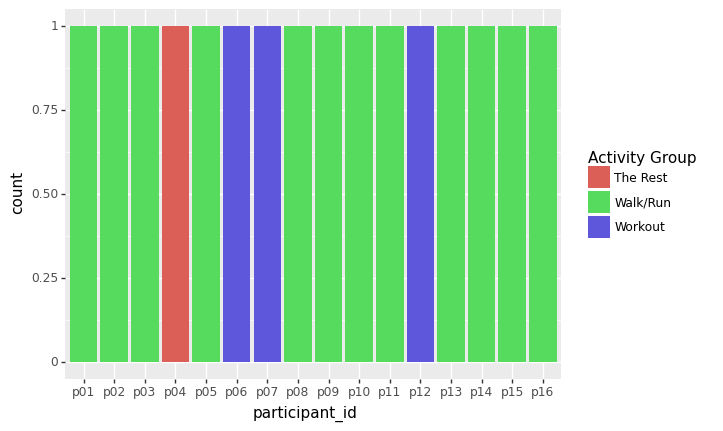

In [ ]:
from plotnine import ggplot, aes, geom_bar, labs

# Assuming you have a DataFrame called 'cleaned_pm_all' with columns 'participant_id' and 'activityGroup'

# Create the plot
plot = (
    ggplot(cleaned_pm_all, aes(x='participant_id', fill='activityGroup')) +
    geom_bar(position='fill') +
    labs(fill='Activity Group')
)

# Display the plot
print(plot)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'cleaned_pm_all' with columns 'participant_id' and 'activityName'

# Calculate the number of distinct activities per participant
dist_activities = cleaned_pm_all.groupby('participant_id')['activityName'].nunique().reset_index(name='dist_activities')

# Sort the DataFrame by the number of distinct activities
dist_activities_sorted = dist_activities.sort_values('dist_activities')

# Calculate the mean of the number of distinct activities
mean_dist_activities = dist_activities_sorted['dist_activities'].mean()

# Print the mean
print(mean_dist_activities)


1.0


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'cleaned_pm_all' with columns 'participant_id' and 'startTime'

# Convert the 'startTime' column to datetime type
cleaned_pm_all['startTime'] = pd.to_datetime(cleaned_pm_all['startTime'])

# Group by 'participant_id' and calculate the minimum and maximum 'startTime' values
start_time_summary = cleaned_pm_all.groupby('participant_id')['startTime'].agg(['min', 'max'])

# Calculate the time difference in days between the maximum and minimum 'startTime' values
start_time_summary['time_diff'] = (start_time_summary['max'] - start_time_summary['min']).dt.days

# Sort the DataFrame by the 'time_diff' column
start_time_summary_sorted = start_time_summary.sort_values('time_diff')

# Print the resulting DataFrame
print(start_time_summary_sorted)


                               min                 max  time_diff
participant_id                                                   
p01            2019-11-01 14:56:32 2019-11-01 14:56:32          0
p02            2019-11-06 15:10:31 2019-11-06 15:10:31          0
p03            2019-11-01 11:45:06 2019-11-01 11:45:06          0
p04            2019-11-05 20:10:00 2019-11-05 20:10:00          0
p05            2019-11-01 18:56:06 2019-11-01 18:56:06          0
p06            2019-11-02 08:44:54 2019-11-02 08:44:54          0
p07            2019-11-06 16:29:50 2019-11-06 16:29:50          0
p08            2019-11-11 14:47:47 2019-11-11 14:47:47          0
p09            2019-11-03 00:17:30 2019-11-03 00:17:30          0
p10            2019-11-07 19:01:53 2019-11-07 19:01:53          0
p11            2019-11-15 10:55:24 2019-11-15 10:55:24          0
p12            2019-11-07 09:26:57 2019-11-07 09:26:57          0
p13            2019-11-11 14:51:47 2019-11-11 14:51:47          0
p14       

**Generate personalized wellness recommendations​ On sleep and Calories**

In [ ]:
# Calculate average sleep duration per participant
avg_sleep_duration = cleaned_pm_sleep_all.groupby('participant_id')['duration'].mean()

# Calculate average daily calorie intake per participant
avg_calorie_intake = cleaned_pm_cal_all.groupby('participant_id')['value'].mean()

# Generate personalized wellness recommendations
recommendations = []

for participant_id in participants:
    sleep_duration = avg_sleep_duration[participant_id]
    calorie_intake = avg_calorie_intake[participant_id]

    recommendation = f"Participant {participant_id}:"

    if sleep_duration < 7:
        recommendation += " Improve sleep quality by maintaining a regular sleep schedule and creating a relaxing bedtime routine."

    if calorie_intake > 2000:
        recommendation += " Maintain a balanced diet and consider reducing calorie intake to promote healthy weight management."

    if sleep_duration >= 7 and calorie_intake <= 2000:
        recommendation += " Congratulations! Your sleep duration and calorie intake are within the recommended range."

    recommendations.append(recommendation)

# Print the personalized wellness recommendations
for recommendation in recommendations:
    print(recommendation)


Participant p01: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p02: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p03: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p04: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p05: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p06: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p07: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p08: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p09: Congratulations! Your sleep duration and calorie intake are within the recommended range.
Participant p10: Congratulations! You

In [ ]:
print(cleaned_pm_all.columns)


Index(['activityName', 'startTime', 'participant_id', 'activityGroup',
       'week_day'],
      dtype='object')


**Sports Injury**

Training and evaluating Random Forest...
Training and evaluating Gradient Boosting...
Training and evaluating K-Nearest Neighbors...
Training and evaluating Support Vector Regression...
Training and evaluating Ridge Regression...
Random Forest Evaluation Metrics:
Mean Squared Error: 858.5602186080936
Root Mean Squared Error: 29.301198245261123
Mean Absolute Error: 25.599351818451233
R^2 Score: -0.03328850817445517

Gradient Boosting Evaluation Metrics:
Mean Squared Error: 859.1799702303164
Root Mean Squared Error: 29.31177187121782
Mean Absolute Error: 25.612991238887084
R^2 Score: -0.034034387397934074

K-Nearest Neighbors Evaluation Metrics:
Mean Squared Error: 1104.102875
Root Mean Squared Error: 33.22804350243932
Mean Absolute Error: 28.486875000000005
R^2 Score: -0.32880232260172204

Support Vector Regression Evaluation Metrics:
Mean Squared Error: 864.031200731725
Root Mean Squared Error: 29.39440764383125
Mean Absolute Error: 25.5746917158029
R^2 Score: -0.039872907071880404

Ri

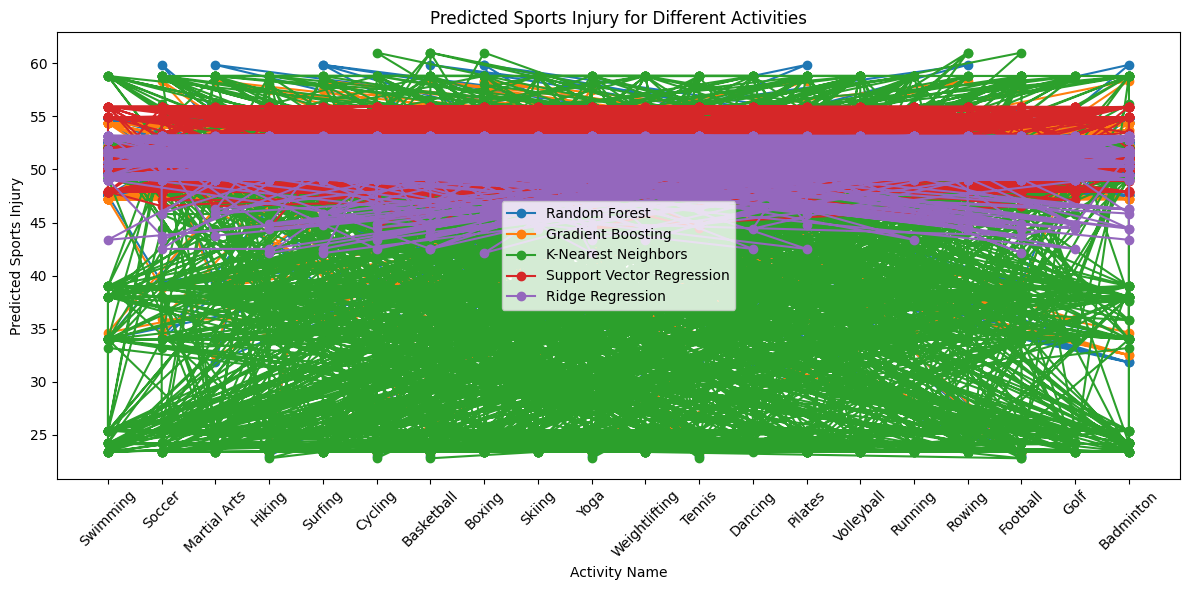

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = '/content/drive/MyDrive/osfstorage-archive/pmdata/i_sports.xlsx'
data = pd.read_excel(file_path)

# Define your features and target variables
features = data[['activityGroup', 'week_day', 'injury']]
target = data['sports_performance']

# Perform one-hot encoding for categorical features
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
features_encoded = ct.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Choose machine learning algorithms
algorithms = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Support Vector Regression', SVR()),
    ('Ridge Regression', Ridge())
]

# Train and evaluate the models
model_results = {}

for name, model in algorithms:
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Print evaluation metrics for each model
for name, results in model_results.items():
    print(f"{name} Evaluation Metrics:")
    print("Mean Squared Error:", results['MSE'])
    print("Root Mean Squared Error:", results['RMSE'])
    print("Mean Absolute Error:", results['MAE'])
    print("R^2 Score:", results['R2'])
    print()

# Load new data from the Excel file for prediction
new_data = pd.read_excel(file_path)  # Replace 'new_data' with the name of the sheet containing new data

# Perform one-hot encoding for new data
new_data_encoded = ct.transform(new_data[['activityGroup', 'week_day', 'injury']])

# Predict using the trained models and store predictions in a dictionary
model_predictions = {}

for name, model in algorithms:
    predictions = model.predict(new_data_encoded)
    model_predictions[name] = predictions

# Plot the predictions for the new data
plt.figure(figsize=(12, 6))

for name, predictions in model_predictions.items():
    plt.plot(new_data['activityName'], predictions, marker='o', label=name)

plt.xlabel('Activity Name')
plt.ylabel('Predicted Sports Injury')
plt.title('Predicted Sports Injury for Different Activities')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



*SPORTS PERFORMANCE*

Training Random Forest...
Evaluating Random Forest...
Training Gradient Boosting...
Evaluating Gradient Boosting...
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Training Support Vector Regression...
Evaluating Support Vector Regression...
Training Ridge Regression...
Evaluating Ridge Regression...


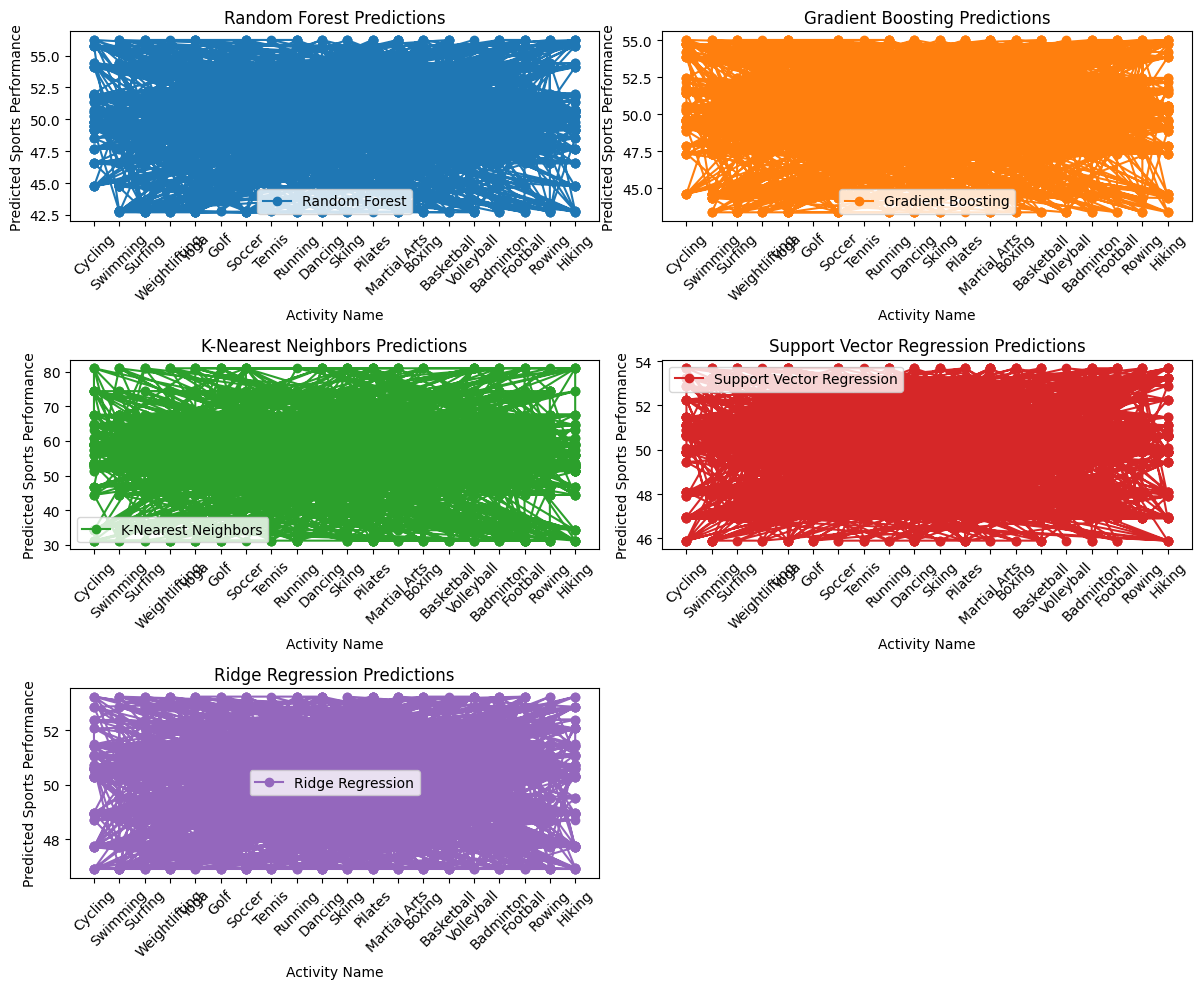

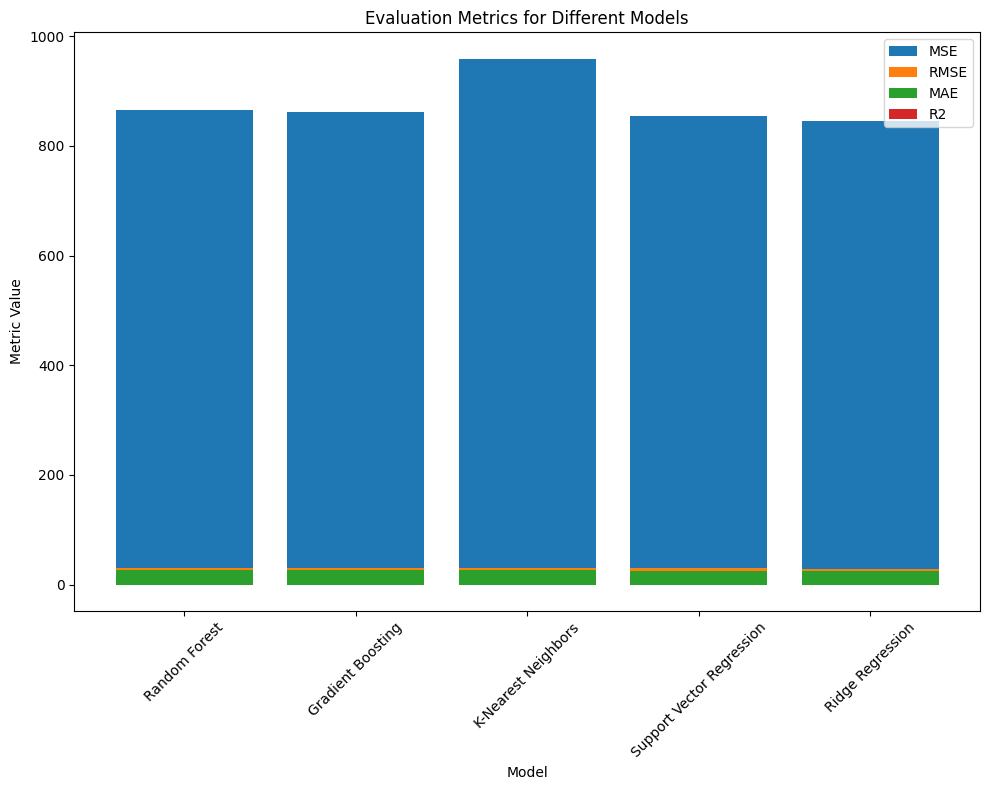

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = '/content/drive/MyDrive/osfstorage-archive/pmdata/p.xlsx'
data = pd.read_excel(file_path)

# Define your features and target variables
features = data[['activityGroup', 'week_day']]
target = data['sports_performance']

# Perform one-hot encoding for categorical features
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
features_encoded = ct.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Choose machine learning algorithms
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Support Vector Regression', SVR()),
    ('Ridge Regression', Ridge())
]

# Define the evaluation metrics for each model
evaluation_metrics = ['MSE', 'RMSE', 'MAE', 'R2']


# Train and evaluate the models
model_results = {}

for model_name, model in models:
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results[model_name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Use the trained models for prediction on new data
new_data = pd.read_excel(file_path)  # Replace 'new_data' with the name of the sheet containing new data

# Perform one-hot encoding for new data
new_data_encoded = ct.transform(new_data[['activityGroup', 'week_day']])

# Predict using the trained models and store predictions in a dictionary
model_predictions = {}

for model_name, model in models:
    predictions = model.predict(new_data_encoded)
    model_predictions[model_name] = predictions
# Calculate evaluation metrics for each model
metric_values = {metric: [results[metric] for results in model_results.values()] for metric in evaluation_metrics}





# Plot the predictions for the new data
plt.figure(figsize=(12, 10))

for i, (model_name, predictions) in enumerate(model_predictions.items(), 1):
    plt.subplot(3, 2, i)  # Create a subplot for each model
    plt.plot(new_data['activityName'], predictions, marker='o', label=model_name, color=f'C{i-1}')
    plt.xlabel('Activity Name')
    plt.ylabel('Predicted Sports Performance')
    plt.title(f'{model_name} Predictions')
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

# Plot the evaluation metrics for each model
plt.figure(figsize=(10, 8))

for metric, values in metric_values.items():
    plt.bar(list(model_results.keys()), values, label=metric)

plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics for Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



EMOTIONS SPORTS PERFORMANCE

Training and evaluating Random Forest...
Training and evaluating Gradient Boosting...
Training and evaluating K-Nearest Neighbors...
Training and evaluating Support Vector Regression...
Training and evaluating Ridge Regression...


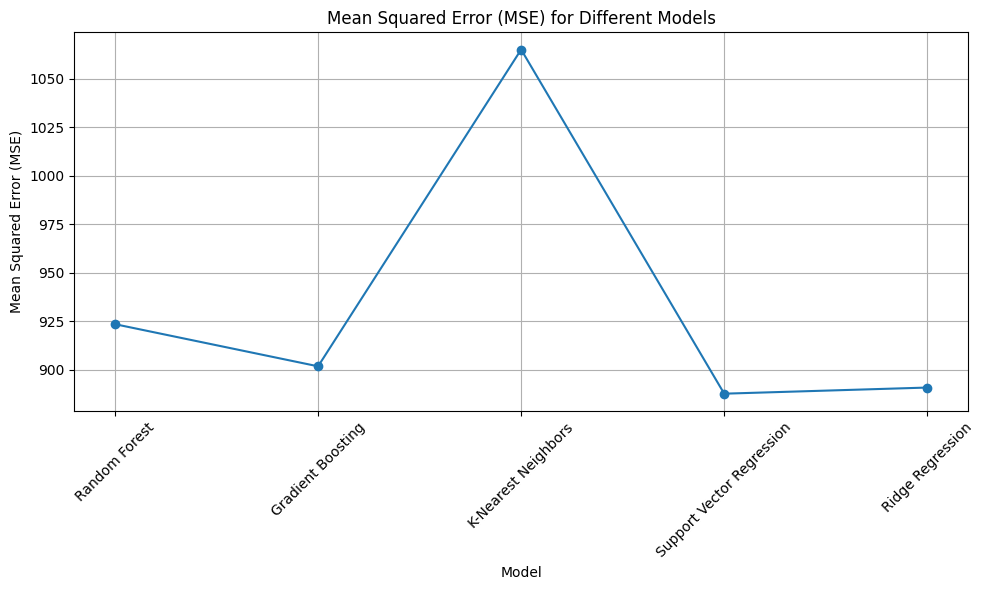

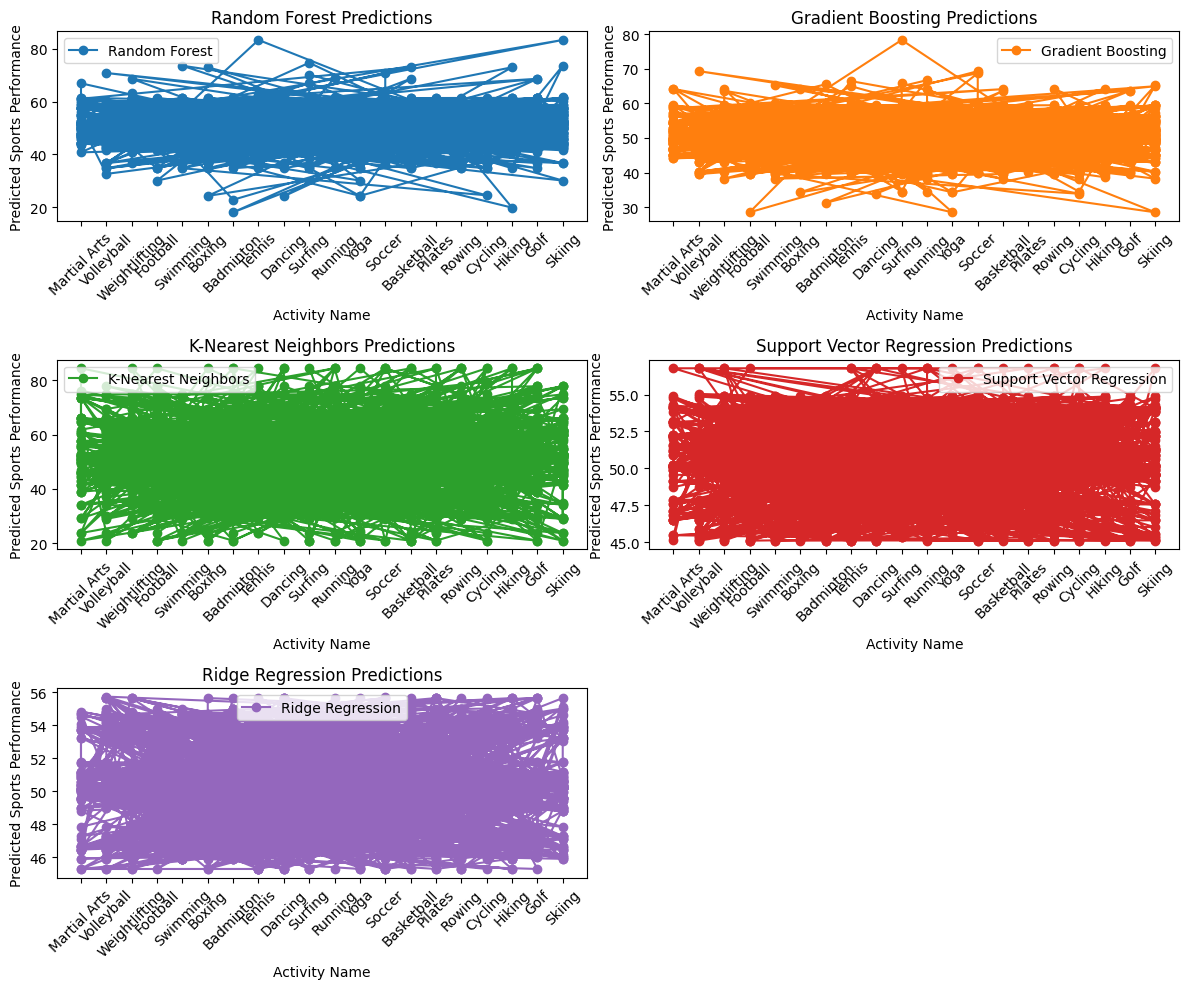

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data from the Excel file
file_path = '/content/drive/MyDrive/osfstorage-archive/pmdata/em_sports.xlsx'
data = pd.read_excel(file_path)

# Define your features and target variables
features = data[['activityGroup', 'week_day', 'injury', 'emotion']]
target = data['sports_performance']

# Perform one-hot encoding for categorical features
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3])],
    remainder='passthrough'
)
features_encoded = ct.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Choose machine learning algorithms
algorithms = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Support Vector Regression', SVR()),
    ('Ridge Regression', Ridge())
]

# Train and evaluate the models
model_results = {}

for name, model in algorithms:
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Plot the MSE for each model as a line plot
plt.figure(figsize=(10, 6))

models = list(model_results.keys())
mse_values = [model_results[model]['MSE'] for model in models]

plt.plot(models, mse_values, marker='o')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)  # Adding grid lines to the plot
plt.show()

# Use the trained models for prediction on new data
new_data = pd.read_excel(file_path)  # Replace 'new_data' with the name of the sheet containing new data

# Perform one-hot encoding for new data
new_data_encoded = ct.transform(new_data[['activityGroup', 'week_day', 'injury', 'emotion']])

# Predict using the trained models and store predictions in a dictionary
model_predictions = {}

for name, model in algorithms:
    predictions = model.predict(new_data_encoded)
    model_predictions[name] = predictions

# Plot the predictions for the new data
plt.figure(figsize=(12, 10))

for i, (model_name, predictions) in enumerate(model_predictions.items(), 1):
    plt.subplot(3, 2, i)  # Create a subplot for each model
    plt.plot(new_data['activityName'], predictions, marker='o', label=model_name, color=f'C{i-1}')
    plt.xlabel('Activity Name')
    plt.ylabel('Predicted Sports Performance')
    plt.title(f'{model_name} Predictions')
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

